# LogisticRegression()

### C의 값 변경하기

In [1]:
from mglearn.datasets import make_forge
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
# X, y 데이터 준비

X, y = make_forge()
X.shape, y.shape

((26, 2), (26,))

In [7]:
# C값을 변경
model = LogisticRegression(C=0.1)
model.fit(X, y)

model.coef_, model.intercept_

(array([[0.12720981, 0.72669603]]), array([-3.40772726]))

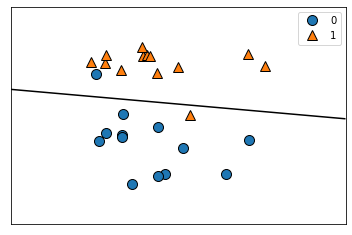

In [12]:
mglearn.plots.plot_2d_separator(model, X, fill=False)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.legend()
plt.show()

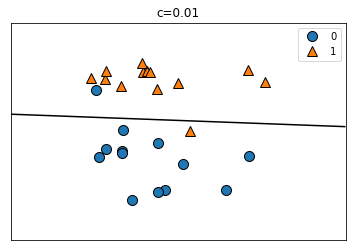

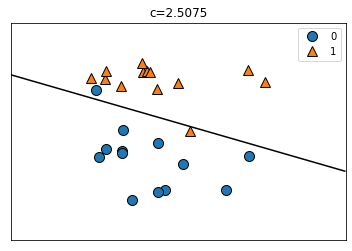

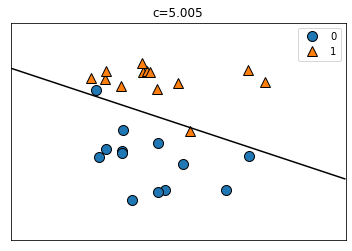

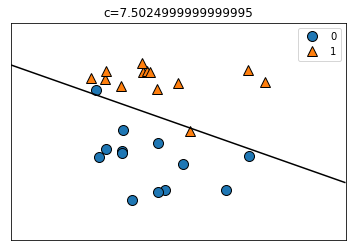

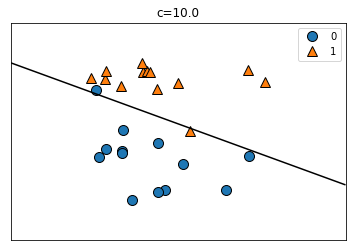

In [31]:
for c in np.linspace(0.01, 10, 5):
    model = LogisticRegression(C=c)
    model.fit(X, y)
    mglearn.plots.plot_2d_separator(model, X, fill=False)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

    plt.title(f"c={c}")
    plt.legend()
    plt.show()

# 유방암 데이터를 이용한 분석-1

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=66)

In [23]:
model = LogisticRegression(C=1, max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=10000)

In [24]:
model.score(X_train, y_train)

0.9577464788732394

In [25]:
model.score(X_test, y_test)

0.965034965034965

In [36]:
for c in np.linspace(0.01, 5, 5):
    print(f"c={c}")
    model = LogisticRegression(C=c, max_iter=10000)
    model.fit(X_train, y_train)
    print(model.score(X_train, y_train))
    print(model.score(X_test, y_test))

c=0.01
0.9483568075117371
0.9370629370629371
c=1.2575
0.960093896713615
0.958041958041958
c=2.505
0.9577464788732394
0.958041958041958
c=3.7525
0.960093896713615
0.958041958041958
c=5.0
0.9624413145539906
0.958041958041958


No handles with labels found to put in legend.


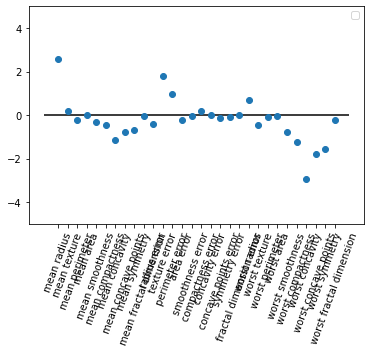

In [45]:
plt.plot(model.coef_.T, 'o')

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=70)

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])

plt.ylim(-5, 5)
plt.legend()
plt.show()

## C를 L1 규제로 사용할 경우

In [49]:
model_L1 = LogisticRegression(C=1, penalty='l1', solver='liblinear')
model_L1.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

### C 변화에 따른 로지스틱 회귀의 훈련 정확도와 테스트 정확도 비교

C=0.001000인 L1 훈련 정확도: 0.9225352112676056
C=0.001000인 L1 테스트 정확도: 0.9020979020979021

C=1.000000인 L1 훈련 정확도: 0.9553990610328639
C=1.000000인 L1 테스트 정확도: 0.958041958041958

C=100.000000인 L1 훈련 정확도: 0.9788732394366197
C=100.000000인 L1 테스트 정확도: 0.958041958041958



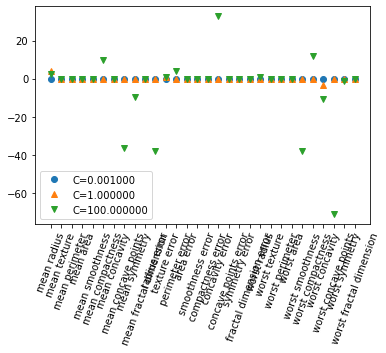

In [64]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    model_L = LogisticRegression(C=C, penalty='l1', solver='liblinear')
    model_L.fit(X_train, y_train)
    
    print(f"C={C:3f}인 L1 훈련 정확도: {model_L.score(X_train, y_train)}")
    print(f"C={C:3f}인 L1 테스트 정확도: {model_L.score(X_test, y_test)}")
    print()

    plt.plot(model_L.coef_.T, marker, label='C={:3f}'.format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=70)
plt.legend(loc=3)
plt.show()
    

In [66]:
# LogisticRegression 실습 04

## 와인 데이터를 이용한 분류

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [73]:
wine = load_wine()
wine.keys()
wine.feature_names, wine.target_names

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['등급'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,등급
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [74]:
df['등급'].value_counts()

1    71
0    59
2    48
Name: 등급, dtype: int64

In [76]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X.shape, y.shape

((178, 13), (178,))

In [ ]:
---이후에는 혼자 해보기